Project Overview


This notebook focuses on building a predictive model to estimate the probability of mortality among patients suffering from heart failure. The goal is to leverage patient data including physiological and laboratory measurements like age, ejection fraction, creatinine levels, and blood pressure to assess risk factors associated with fatal outcomes.

Heart failure compromises the heart’s ability to circulate blood efficiently, making it a critical area for early risk detection. With predictive analytics and machine learning, we can uncover patterns in clinical data that may help in anticipating adverse outcomes and enhancing patient management strategies.

The major components of this project include:

Importing and preparing the dataset

Conducting exploratory data analysis (EDA)

Training machine learning algorithms to make predictions

Evaluating model performance

# Importing required libraries


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
HeartFailureDF=pd.read_csv('/kaggle/input/heart-failure-data/Heart Failure Data.csv')  
HeartFailureDF




,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Understanding the dataset


In [4]:
# checking info about the dataset
HeartFailureDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# Getting details of the null values in the dataset
HeartFailureDF.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

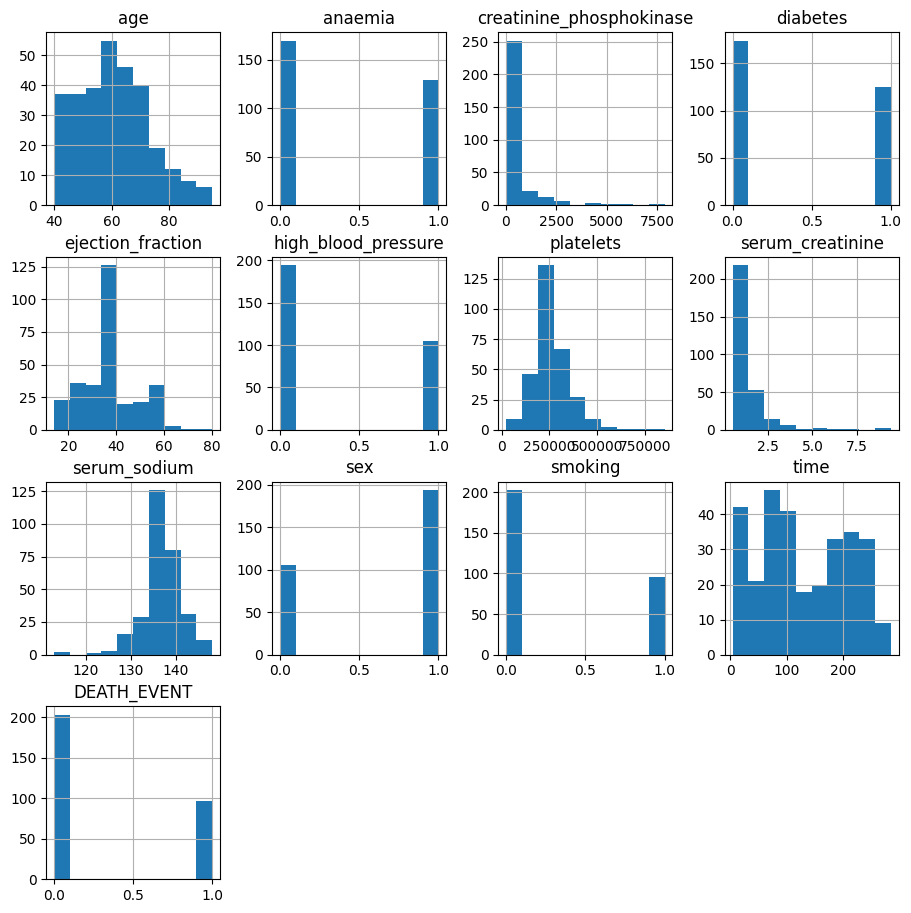

In [8]:
# Getting a statistical brreakdown of the dataset

HeartFailureDF.hist(figsize=(11,11))
plt.show()

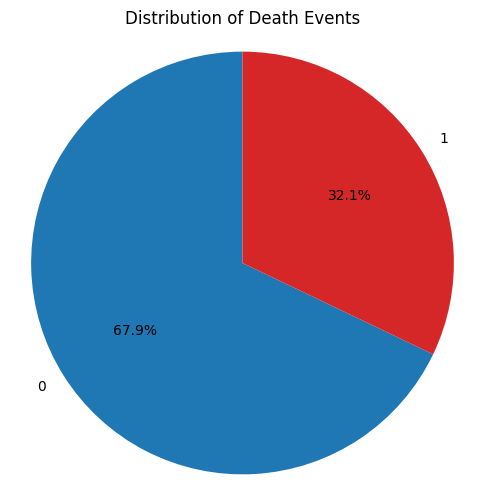

In [7]:
count = HeartFailureDF['DEATH_EVENT'].value_counts()

colors = ['#1f77b4', '#d62728']  # blue for survived, red for death

plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Death Events')
plt.axis('equal') 
plt.show()

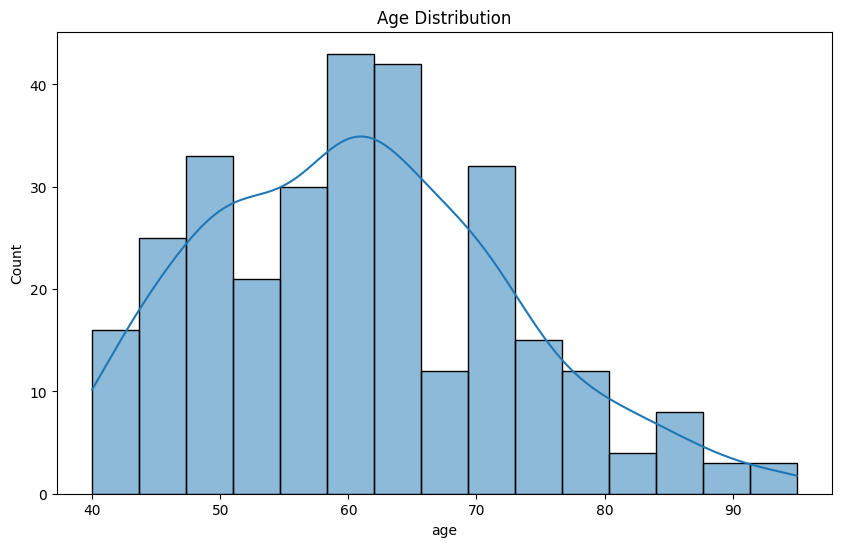

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age',data=HeartFailureDF,kde=True,bins=15)
plt.title('Age Distribution')
plt.show()


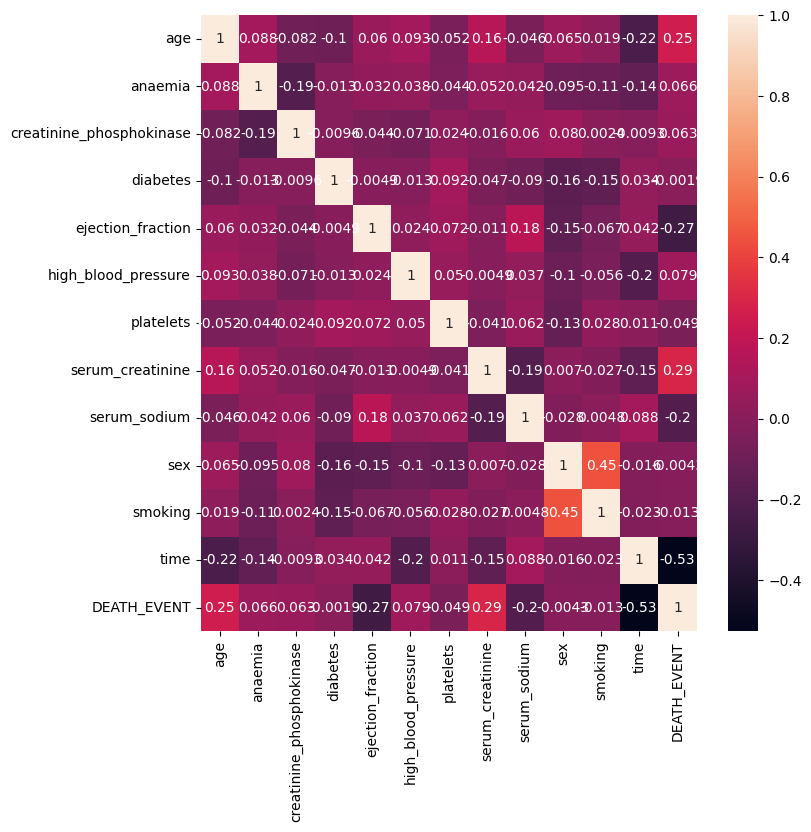

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(HeartFailureDF.corr(),annot=True)
plt.show()

# Feature selection 


In [10]:
X = HeartFailureDF.drop('DEATH_EVENT', axis=1)
y = HeartFailureDF['DEATH_EVENT']




# Normalize features

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset 



In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Model Development

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90



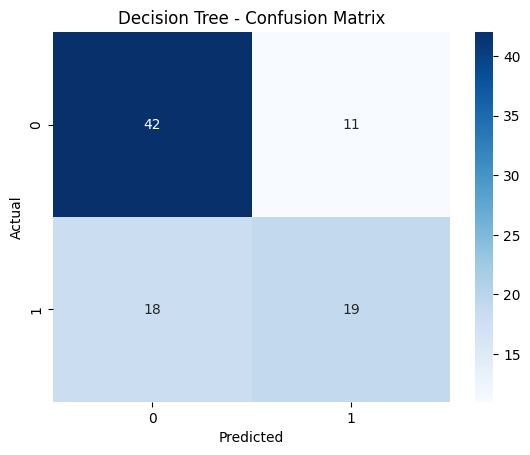

In [13]:
# Cell 6: Decision Tree Classifier
# ================================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN - Classification Report
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        53
           1       0.86      0.32      0.47        37

    accuracy                           0.70        90
   macro avg       0.76      0.64      0.63        90
weighted avg       0.75      0.70      0.66        90



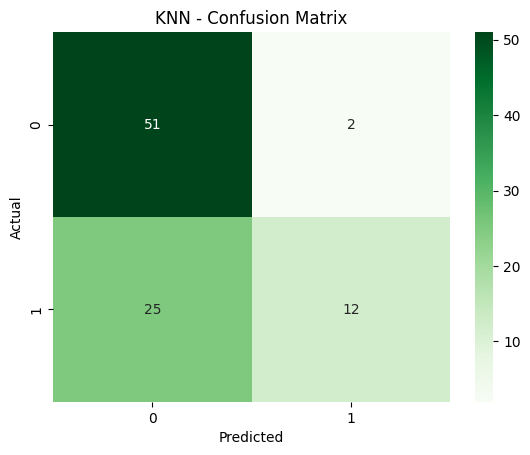

In [14]:
# Cell 7: K-Nearest Neighbors Classifier
# ======================================
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN - Classification Report")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.88      0.57      0.69        37

    accuracy                           0.79        90
   macro avg       0.82      0.76      0.76        90
weighted avg       0.81      0.79      0.78        90



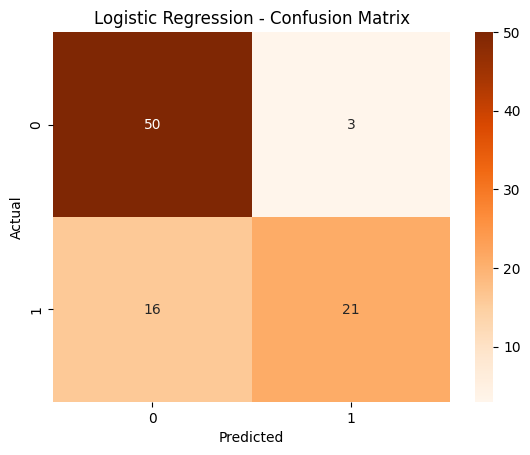

In [15]:
# Cell 8: Logistic Regression
# ===========================
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Model Comparison


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for all models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracies
print(f"Decision Tree Accuracy:        {accuracy_dt:.4f}")
print(f"K-Nearest Neighbors Accuracy:  {accuracy_knn:.4f}")
print(f"Logistic Regression Accuracy:  {accuracy_lr:.4f}")

Decision Tree Accuracy:        0.6778
K-Nearest Neighbors Accuracy:  0.7000
Logistic Regression Accuracy:  0.7889


# Model Evaluation

In [22]:
from sklearn.metrics import classification_report

print("Decision Tree - Classification Report")
print(classification_report(y_test, y_pred_dt))

print("\nKNN - Classification Report")
print(classification_report(y_test, y_pred_knn))

print("\nLogistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr))

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90


KNN - Classification Report
              precision    recall  f1-score   support

           0       0.67      0.96      0.79        53
           1       0.86      0.32      0.47        37

    accuracy                           0.70        90
   macro avg       0.76      0.64      0.63        90
weighted avg       0.75      0.70      0.66        90


Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        53
           1       0.88      0.57      0.69        37

    accuracy                           0.79        90
   macro avg    

# Conclusion

Based on Model Comparison and Evaluation, the best model is the Logistic Regression with an acuracy of 78%.